In [33]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [3]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [4]:
X_train = df.drop('class', axis=1)

In [7]:
y_train = df['class']

In [9]:
y_train.head()

0    0
1    1
2    1
3    0
4    0
Name: class, dtype: int64

In [19]:
est = RandomForestClassifier(random_state=0)

In [20]:
clf = GridSearchCV(est, {
    'n_estimators': range(10, 51, 10),
    'max_depth': range(1, 13, 2),
    'min_samples_leaf': range(1, 8),
    'min_samples_split': range(2, 10, 2)
}, n_jobs=-1)

In [21]:
clf.fit(X_train, y_train)

/home/alina/intro-to-data-science-stepik/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2), 'min_samples_leaf': range(1, 8), 'min_samples_split': range(2, 10, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
rf = clf.best_estimator_

In [22]:
clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

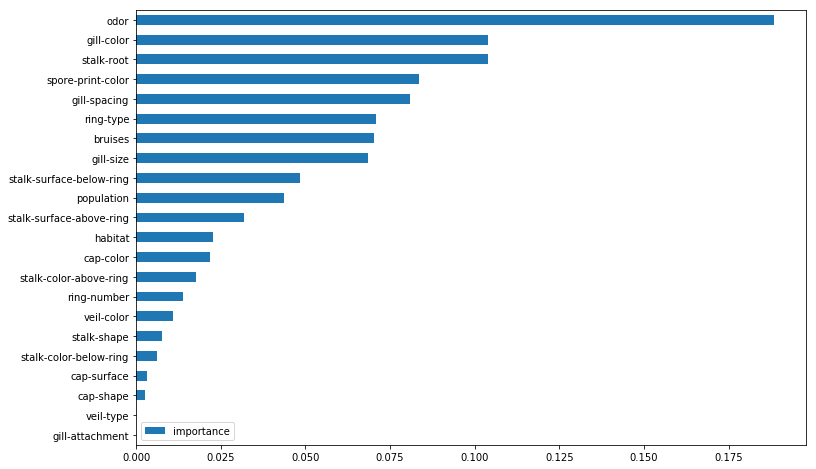

In [25]:
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [26]:
x_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [27]:
pred = rf.predict(x_test)

In [28]:
pred

array([0, 0, 1, ..., 1, 0, 1])

In [29]:
pred[pred == 1].size

976

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
y_test = pd.read_csv('testing_y_mush.csv')

In [34]:
df_cm = confusion_matrix(y_test, pred)

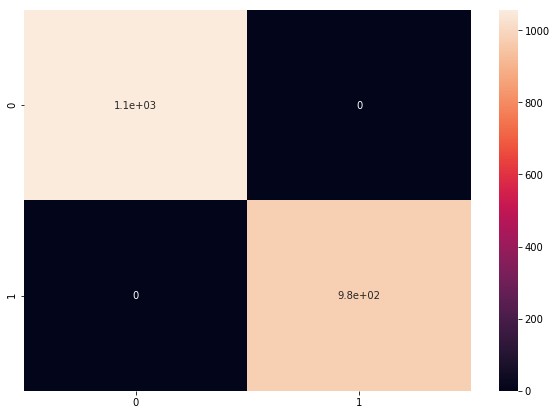

In [35]:
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)